<a href="https://colab.research.google.com/github/saimaayub/DS-project/blob/main/FRCode_daily_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Path to the file
file_path = '/content/drive/My Drive/LCL-June2015v2_0.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

,LCLid,stdorToU,DateTime,KWH/hh (per half hour)
0,MAC000002,Std,2012-10-12 00:30:00.0000000,0
1,MAC000002,Std,2012-10-12 01:00:00.0000000,0
2,MAC000002,Std,2012-10-12 01:30:00.0000000,0
3,MAC000002,Std,2012-10-12 02:00:00.0000000,0
4,MAC000002,Std,2012-10-12 02:30:00.0000000,0


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column                   Non-Null Count    Dtype 
---  ------                   --------------    ----- 
 0   LCLid                    1000000 non-null  object
 1   stdorToU                 1000000 non-null  object
 2   DateTime                 1000000 non-null  object
 3   KWH/hh (per half hour)   1000000 non-null  object
dtypes: object(4)
memory usage: 30.5+ MB
None


In [6]:
# Display summary statistics
print(df.describe())

            LCLid stdorToU                     DateTime  \
count     1000000  1000000                      1000000   
unique         30        1                        39102   
top     MAC000018      Std  2012-11-20 00:00:00.0000000   
freq        39082  1000000                           58   

       KWH/hh (per half hour)   
count                  1000000  
unique                    4801  
top                         0   
freq                     45538  


In [7]:
# Convert the DateTime column to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [8]:
# Display the original DataFrame column names
print("Original columns:", df.columns)

# Rename the column
df.rename(columns={'KWH/hh (per half hour) ': 'KWH/hh'}, inplace=True)

# Display the DataFrame after renaming the column
print("\nColumns after renaming:", df.columns)

Original columns: Index(['LCLid', 'stdorToU', 'DateTime', 'KWH/hh (per half hour) '], dtype='object')

Columns after renaming: Index(['LCLid', 'stdorToU', 'DateTime', 'KWH/hh'], dtype='object')


In [9]:
# Convert the renamed column to numeric
df['KWH/hh'] = pd.to_numeric(df['KWH/hh'], errors='coerce')

In [10]:
# Group by day and calculate the mean of kWh/hh for each day
daily_data = df.groupby(df['DateTime'].dt.date)['KWH/hh'].mean().reset_index()

# Print the first few rows of daily_data for verification
print(daily_data.head())

     DateTime    KWH/hh
0  2011-12-06  0.133955
1  2011-12-07  0.290976
2  2011-12-08  0.272340
3  2011-12-09  0.237201
4  2011-12-10  0.269921


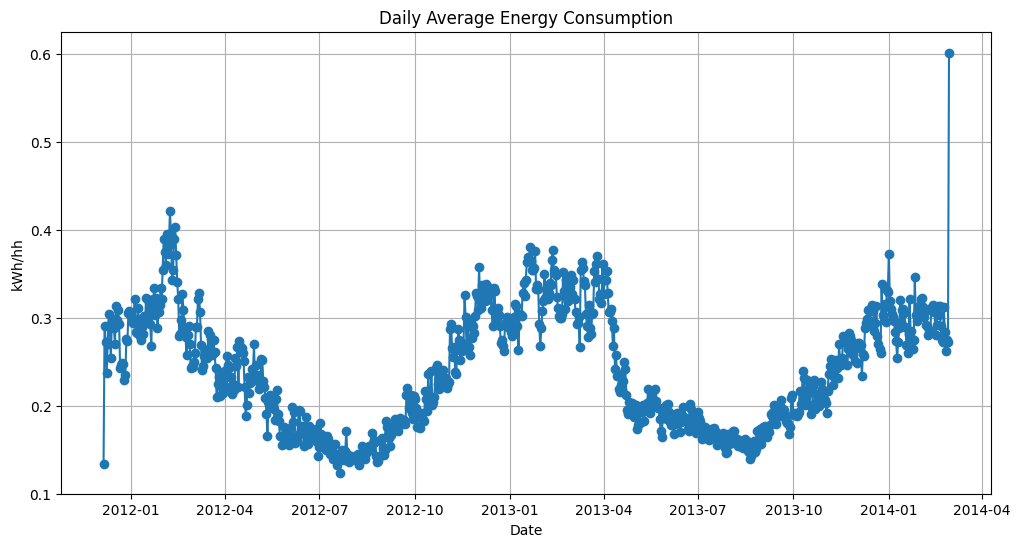

In [11]:
#plotting the data
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(daily_data['DateTime'], daily_data['KWH/hh'], marker='o', linestyle='-')
plt.title('Daily Average Energy Consumption')
plt.xlabel('Date')
plt.ylabel('kWh/hh')
plt.grid(True)
plt.show()

In [12]:
print(daily_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DateTime  816 non-null    object 
 1   KWH/hh    816 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.9+ KB
None


In [13]:
file_path = '/content/drive/My Drive/weather-data.csv'

# Read the CSV file into a DataFrame
weatherdf = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify
print(weatherdf.head())

         time  weather_code (wmo code)  temperature_2m_max (°C)  \
0  01/11/2011                       51                     15.0   
1  02/11/2011                       51                     14.2   
2  03/11/2011                       53                     15.6   
3  04/11/2011                       61                     14.9   
4  05/11/2011                       51                     13.9   

   temperature_2m_min (°C)  temperature_2m_mean (°C)  \
0                      8.9                      13.1   
1                      8.4                      11.4   
2                     12.9                      14.6   
3                     11.1                      12.7   
4                      8.6                      11.4   

   apparent_temperature_max (°C)  apparent_temperature_min (°C)  \
0                           13.2                            7.1   
1                           12.1                            6.0   
2                           13.7                           

In [14]:
# Convert the time column to datetime format with dayfirst=True
weatherdf['time'] = pd.to_datetime(weatherdf['time'], dayfirst=True)

# Display the DataFrame to verify the conversion
print(weatherdf.head())

        time  weather_code (wmo code)  temperature_2m_max (°C)  \
0 2011-11-01                       51                     15.0   
1 2011-11-02                       51                     14.2   
2 2011-11-03                       53                     15.6   
3 2011-11-04                       61                     14.9   
4 2011-11-05                       51                     13.9   

   temperature_2m_min (°C)  temperature_2m_mean (°C)  \
0                      8.9                      13.1   
1                      8.4                      11.4   
2                     12.9                      14.6   
3                     11.1                      12.7   
4                      8.6                      11.4   

   apparent_temperature_max (°C)  apparent_temperature_min (°C)  \
0                           13.2                            7.1   
1                           12.1                            6.0   
2                           13.7                           11.9  

In [15]:
print(weatherdf.columns)


Index(['time', 'weather_code (wmo code)', 'temperature_2m_max (°C)',
       'temperature_2m_min (°C)', 'temperature_2m_mean (°C)',
       'apparent_temperature_max (°C)', 'apparent_temperature_min (°C)',
       'apparent_temperature_mean (°C)', 'sunrise (iso8601)',
       'sunset (iso8601)', 'daylight_duration (s)', 'sunshine_duration (s)',
       'precipitation_sum (mm)', 'rain_sum (mm)', 'precipitation_hours (h)',
       'wind_speed_10m_max (km/h)', 'wind_direction_10m_dominant (°)'],
      dtype='object')


In [16]:
weatherdf = weatherdf[['time', 'weather_code (wmo code)', 'temperature_2m_max (°C)',
       'temperature_2m_min (°C)', 'temperature_2m_mean (°C)',
       'apparent_temperature_max (°C)', 'apparent_temperature_min (°C)',
       'apparent_temperature_mean (°C)', 'sunrise (iso8601)',
       'sunset (iso8601)', 'daylight_duration (s)', 'sunshine_duration (s)',
       'precipitation_sum (mm)', 'rain_sum (mm)', 'precipitation_hours (h)',
       'wind_speed_10m_max (km/h)', 'wind_direction_10m_dominant (°)']]
weatherdf = weatherdf.dropna()

In [21]:
weatherdf.head()

,time,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),daylight_duration (s),sunshine_duration (s),precipitation_sum (mm),rain_sum (mm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_direction_10m_dominant (°),DateTime
0,2011-11-01,51,15.0,8.9,13.1,13.2,7.1,11.3,2011-11-01T07:53,2011-11-01T17:34,34876.89,23635.93,0.9,0.9,5,18.8,205,2011-11-01
1,2011-11-02,51,14.2,8.4,11.4,12.1,6.0,8.6,2011-11-02T07:55,2011-11-02T17:33,34662.17,24176.65,1.6,1.6,5,23.4,142,2011-11-02
2,2011-11-03,53,15.6,12.9,14.6,13.7,11.9,12.8,2011-11-03T07:57,2011-11-03T17:31,34448.32,899.05,4.1,4.1,15,25.8,163,2011-11-03
3,2011-11-04,61,14.9,11.1,12.7,12.8,10.2,11.4,2011-11-04T07:59,2011-11-04T17:29,34235.54,10425.34,12.8,12.8,16,19.6,177,2011-11-04
4,2011-11-05,51,13.9,8.6,11.4,12.0,7.5,9.7,2011-11-05T08:00,2011-11-05T17:27,34024.06,6934.98,0.4,0.4,4,19.0,355,2011-11-05


In [22]:
# Convert the time column to datetime format with dayfirst=True
weatherdf['time'] = pd.to_datetime(weatherdf['time'], dayfirst=True)

# Create a new column 'DateTime' which is just the date part of the 'time' column so we have same column name for day in both datasets
weatherdf['DateTime'] = weatherdf['time'].dt.date

In [19]:
#weatherdf['DateTime'] = weatherdf['time'].dt.date
#daily_data['DateTime'] = pd.to_datetime(df['DateTime']).dt.date

In [23]:
#weatherdf_df = df.merge(weatherdf, on='DateTime')

ValueError: You are trying to merge on datetime64[ns] and object columns. If you wish to proceed you should use pd.concat

In [24]:
# Convert 'time' column in weatherdf to datetime and create 'day' column
weatherdf['time'] = pd.to_datetime(weatherdf['time'], dayfirst=True)
weatherdf['day'] = weatherdf['time'].dt.date

# Convert 'DateTime' column in df to datetime and create 'day' column
daily_data['DateTime'] = pd.to_datetime(df['DateTime'])
daily_data['day'] = df['DateTime'].dt.date

In [25]:
print(weatherdf.head())

        time  weather_code (wmo code)  temperature_2m_max (°C)  \
0 2011-11-01                       51                     15.0   
1 2011-11-02                       51                     14.2   
2 2011-11-03                       53                     15.6   
3 2011-11-04                       61                     14.9   
4 2011-11-05                       51                     13.9   

   temperature_2m_min (°C)  temperature_2m_mean (°C)  \
0                      8.9                      13.1   
1                      8.4                      11.4   
2                     12.9                      14.6   
3                     11.1                      12.7   
4                      8.6                      11.4   

   apparent_temperature_max (°C)  apparent_temperature_min (°C)  \
0                           13.2                            7.1   
1                           12.1                            6.0   
2                           13.7                           11.9  

In [26]:
print(daily_data.head())

             DateTime    KWH/hh         day
0 2012-10-12 00:30:00  0.133955  2012-10-12
1 2012-10-12 01:00:00  0.290976  2012-10-12
2 2012-10-12 01:30:00  0.272340  2012-10-12
3 2012-10-12 02:00:00  0.237201  2012-10-12
4 2012-10-12 02:30:00  0.269921  2012-10-12


## Merging consumption data with weather data.

In [27]:
merged_df = pd.merge(daily_data, weatherdf, on='day')

In [28]:
print(merged_df.head(800))

             DateTime_x    KWH/hh         day       time  \
0   2012-10-12 00:30:00  0.133955  2012-10-12 2012-10-12   
1   2012-10-12 01:00:00  0.290976  2012-10-12 2012-10-12   
2   2012-10-12 01:30:00  0.272340  2012-10-12 2012-10-12   
3   2012-10-12 02:00:00  0.237201  2012-10-12 2012-10-12   
4   2012-10-12 02:30:00  0.269921  2012-10-12 2012-10-12   
..                  ...       ...         ...        ...   
795 2012-10-28 14:00:00  0.280714  2012-10-28 2012-10-28   
796 2012-10-28 14:30:00  0.285554  2012-10-28 2012-10-28   
797 2012-10-28 15:00:00  0.283770  2012-10-28 2012-10-28   
798 2012-10-28 15:30:00  0.310486  2012-10-28 2012-10-28   
799 2012-10-28 16:00:00  0.307335  2012-10-28 2012-10-28   

     weather_code (wmo code)  temperature_2m_max (°C)  \
0                         53                     13.9   
1                         53                     13.9   
2                         53                     13.9   
3                         53                     13

In [29]:
print(merged_df.columns)

Index(['DateTime_x', 'KWH/hh', 'day', 'time', 'weather_code (wmo code)',
       'temperature_2m_max (°C)', 'temperature_2m_min (°C)',
       'temperature_2m_mean (°C)', 'apparent_temperature_max (°C)',
       'apparent_temperature_min (°C)', 'apparent_temperature_mean (°C)',
       'sunrise (iso8601)', 'sunset (iso8601)', 'daylight_duration (s)',
       'sunshine_duration (s)', 'precipitation_sum (mm)', 'rain_sum (mm)',
       'precipitation_hours (h)', 'wind_speed_10m_max (km/h)',
       'wind_direction_10m_dominant (°)', 'DateTime_y'],
      dtype='object')


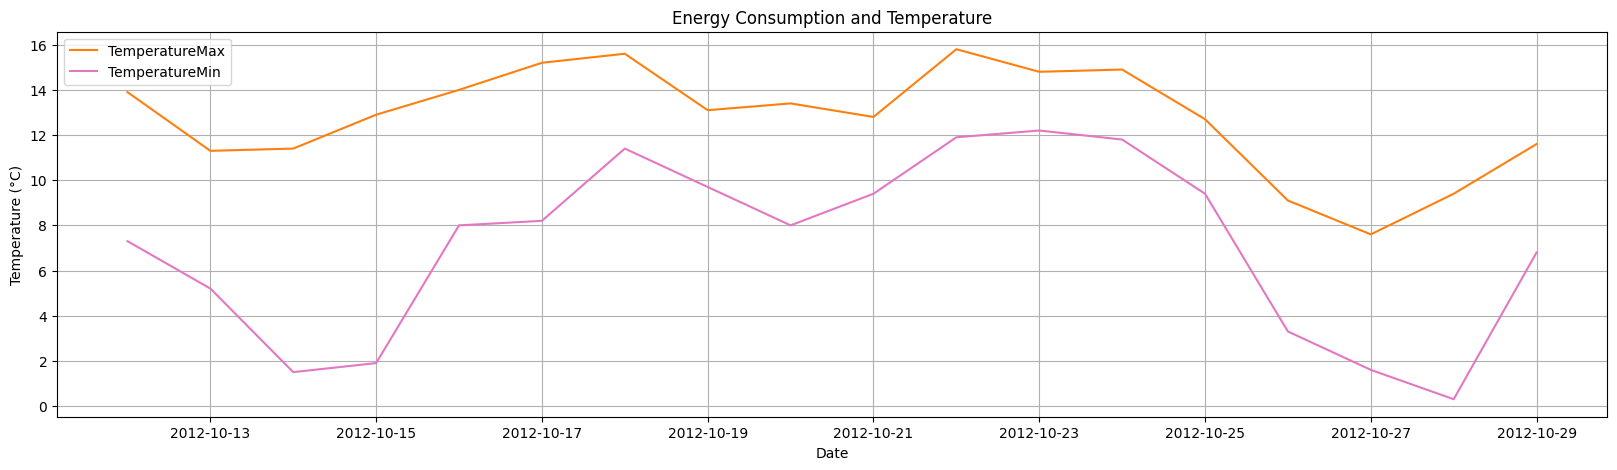

In [30]:
# Plotting
fig, ax1 = plt.subplots(figsize=(20, 5))

# Plot temperature data
ax1.plot(merged_df['day'], merged_df['temperature_2m_max (°C)'], color='tab:orange', label='TemperatureMax')
ax1.plot(merged_df['day'], merged_df['temperature_2m_min (°C)'], color='tab:pink', label='TemperatureMin')
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (°C)')
ax1.legend(loc='upper left')


# Title and grid
plt.title('Energy Consumption and Temperature')
plt.grid()

plt.show()

##As the graph above shows that there are some lines that don't seem appropriate and it is because of missing values. So now we are going to remove the rows with missing values.


In [31]:
# Check for missing values in the DataFrame
print("Missing values in each column:")
print(merged_df.isna().sum())

Missing values in each column:
DateTime_x                         0
KWH/hh                             0
day                                0
time                               0
weather_code (wmo code)            0
temperature_2m_max (°C)            0
temperature_2m_min (°C)            0
temperature_2m_mean (°C)           0
apparent_temperature_max (°C)      0
apparent_temperature_min (°C)      0
apparent_temperature_mean (°C)     0
sunrise (iso8601)                  0
sunset (iso8601)                   0
daylight_duration (s)              0
sunshine_duration (s)              0
precipitation_sum (mm)             0
rain_sum (mm)                      0
precipitation_hours (h)            0
wind_speed_10m_max (km/h)          0
wind_direction_10m_dominant (°)    0
DateTime_y                         0
dtype: int64


In [32]:
# Remove rows with missing values in specific columns
#merged_df = merged_df.dropna(subset=['day', 'temperature_2m_max (°C)', 'temperature_2m_min (°C)', 'KWH/hh'])

# Ensure the data is sorted by 'day' column
merged_df = merged_df.sort_values(by='day')

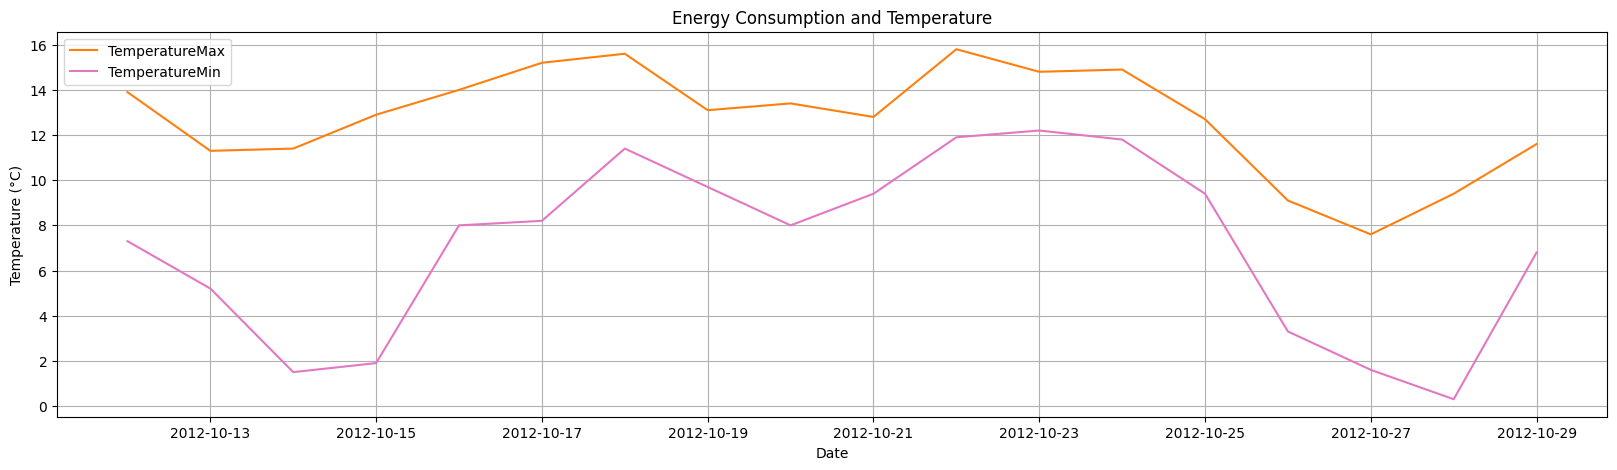

In [34]:
# Plotting
fig, ax1 = plt.subplots(figsize=(20, 5))

# Plot temperature data
ax1.plot(merged_df['day'], merged_df['temperature_2m_max (°C)'], color='tab:orange', label='TemperatureMax')
ax1.plot(merged_df['day'], merged_df['temperature_2m_min (°C)'], color='tab:pink', label='TemperatureMin')
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (°C)')
ax1.legend(loc='upper left')
# Title and grid
plt.title('Energy Consumption and Temperature')
plt.grid()

plt.show()

## Interpretation:


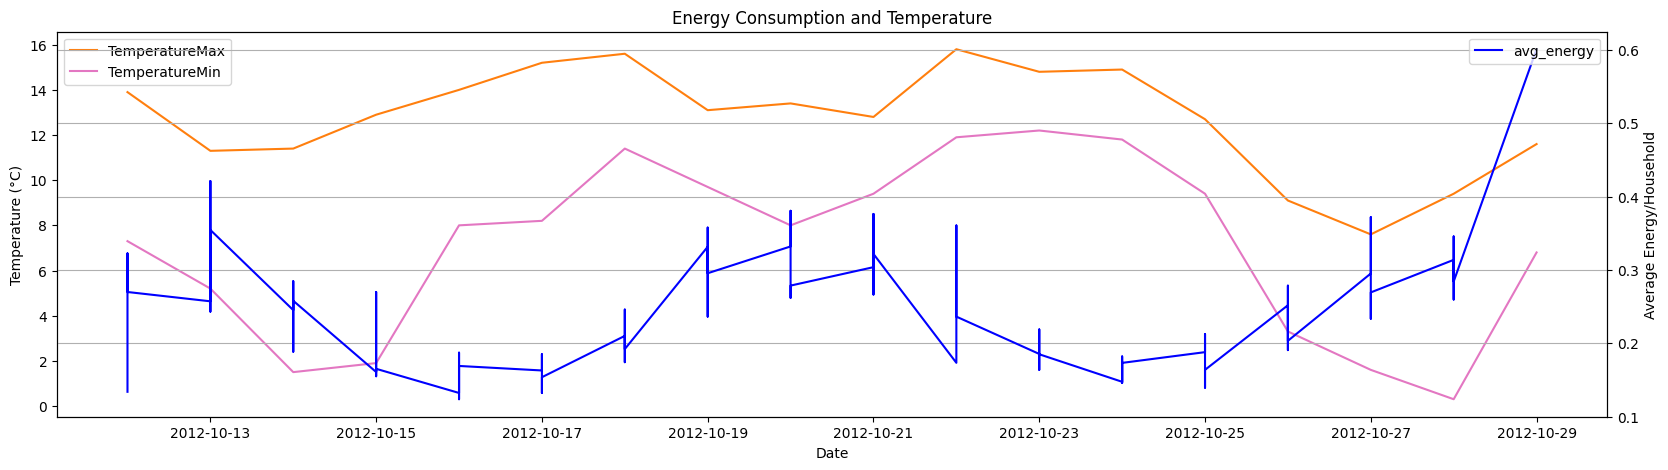

In [35]:
# Plotting
fig, ax1 = plt.subplots(figsize=(20, 5))

# Plot temperature data
ax1.plot(merged_df['day'], merged_df['temperature_2m_max (°C)'], color='tab:orange', label='TemperatureMax')
ax1.plot(merged_df['day'], merged_df['temperature_2m_min (°C)'], color='tab:pink', label='TemperatureMin')
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (°C)')
ax1.legend(loc='upper left')
# Create a second y-axis for energy consumption
ax2 = ax1.twinx()
ax2.plot(merged_df['day'], merged_df['KWH/hh'], color='blue', label='avg_energy')
ax2.set_ylabel('Average Energy/Household')
ax2.legend(loc='upper right')
# Title and grid
plt.title('Energy Consumption and Temperature')
plt.grid()

plt.show()


In [36]:
print(daily_data.head(1000))

               DateTime    KWH/hh         day
0   2012-10-12 00:30:00  0.133955  2012-10-12
1   2012-10-12 01:00:00  0.290976  2012-10-12
2   2012-10-12 01:30:00  0.272340  2012-10-12
3   2012-10-12 02:00:00  0.237201  2012-10-12
4   2012-10-12 02:30:00  0.269921  2012-10-12
..                  ...       ...         ...
811 2012-10-28 22:00:00  0.284011  2012-10-28
812 2012-10-28 22:30:00  0.261856  2012-10-28
813 2012-10-28 23:00:00  0.274363  2012-10-28
814 2012-10-28 23:30:00  0.272550  2012-10-28
815 2012-10-29 00:00:00  0.601038  2012-10-29

[816 rows x 3 columns]


In [ ]:
df = pd.DataFrame(daily_data)

# Define the file path where you want to save the Excel file
file_path = '/content/daily_df.xlsx'  # Adjust the path as needed

# Export the DataFrame to Excel
df.to_excel(file_path, index=False)

print(f'Data saved to {file_path}')

Data saved to /content/daily_df.xlsx


In [ ]:
print(df)

            LCLid stdorToU   DateTime  KWH/hh         day
0       MAC000002      Std 2012-10-12   0.000  2012-10-12
1       MAC000002      Std 2012-10-12   0.000  2012-10-12
2       MAC000002      Std 2012-10-12   0.000  2012-10-12
3       MAC000002      Std 2012-10-12   0.000  2012-10-12
4       MAC000002      Std 2012-10-12   0.000  2012-10-12
...           ...      ...        ...     ...         ...
999995  MAC000036      Std 2012-11-08   0.228  2012-11-08
999996  MAC000036      Std 2012-11-08   0.042  2012-11-08
999997  MAC000036      Std 2012-11-08   0.076  2012-11-08
999998  MAC000036      Std 2012-11-08   0.070  2012-11-08
999999  MAC000036      Std 2012-11-08   0.005  2012-11-08

[1000000 rows x 5 columns]


In [42]:
column_names = merged_df.columns
print(column_names)

Index(['DateTime_x', 'KWH/hh', 'day', 'time', 'weather_code (wmo code)',
       'temperature_2m_max (°C)', 'temperature_2m_min (°C)',
       'temperature_2m_mean (°C)', 'apparent_temperature_max (°C)',
       'apparent_temperature_min (°C)', 'apparent_temperature_mean (°C)',
       'sunrise (iso8601)', 'sunset (iso8601)', 'daylight_duration (s)',
       'sunshine_duration (s)', 'precipitation_sum (mm)', 'rain_sum (mm)',
       'precipitation_hours (h)', 'wind_speed_10m_max (km/h)',
       'wind_direction_10m_dominant (°)', 'DateTime_y'],
      dtype='object')


In [45]:
# Select only numeric columns
numeric_cols = ['KWH/hh', 'temperature_2m_max (°C)', 'temperature_2m_min (°C)',
                'temperature_2m_mean (°C)', 'apparent_temperature_max (°C)',
                'apparent_temperature_min (°C)', 'apparent_temperature_mean (°C)',
                'daylight_duration (s)', 'sunshine_duration (s)', 'precipitation_sum (mm)',
                'rain_sum (mm)', 'precipitation_hours (h)', 'wind_speed_10m_max (km/h)',
                'wind_direction_10m_dominant (°)']
# Ensure these columns exist in your DataFrame
numeric_cols = [col for col in numeric_cols if col in merged_df.columns]

# Calculate the correlation matrix for numeric columns
cor_matrix = merged_df[numeric_cols].corr()

# Display the correlation matrix
print(cor_matrix)

                                   KWH/hh  temperature_2m_max (°C)  \
KWH/hh                           1.000000                -0.412645   
temperature_2m_max (°C)         -0.412645                 1.000000   
temperature_2m_min (°C)         -0.270019                 0.826209   
temperature_2m_mean (°C)        -0.374881                 0.924520   
apparent_temperature_max (°C)   -0.213411                 0.929577   
apparent_temperature_min (°C)   -0.225288                 0.873686   
apparent_temperature_mean (°C)  -0.255427                 0.903761   
daylight_duration (s)            0.000183                 0.379801   
sunshine_duration (s)           -0.066830                -0.148709   
precipitation_sum (mm)          -0.048676                 0.221994   
rain_sum (mm)                   -0.048676                 0.221994   
precipitation_hours (h)          0.070459                 0.070920   
wind_speed_10m_max (km/h)       -0.319904                -0.228788   
wind_direction_10m_d

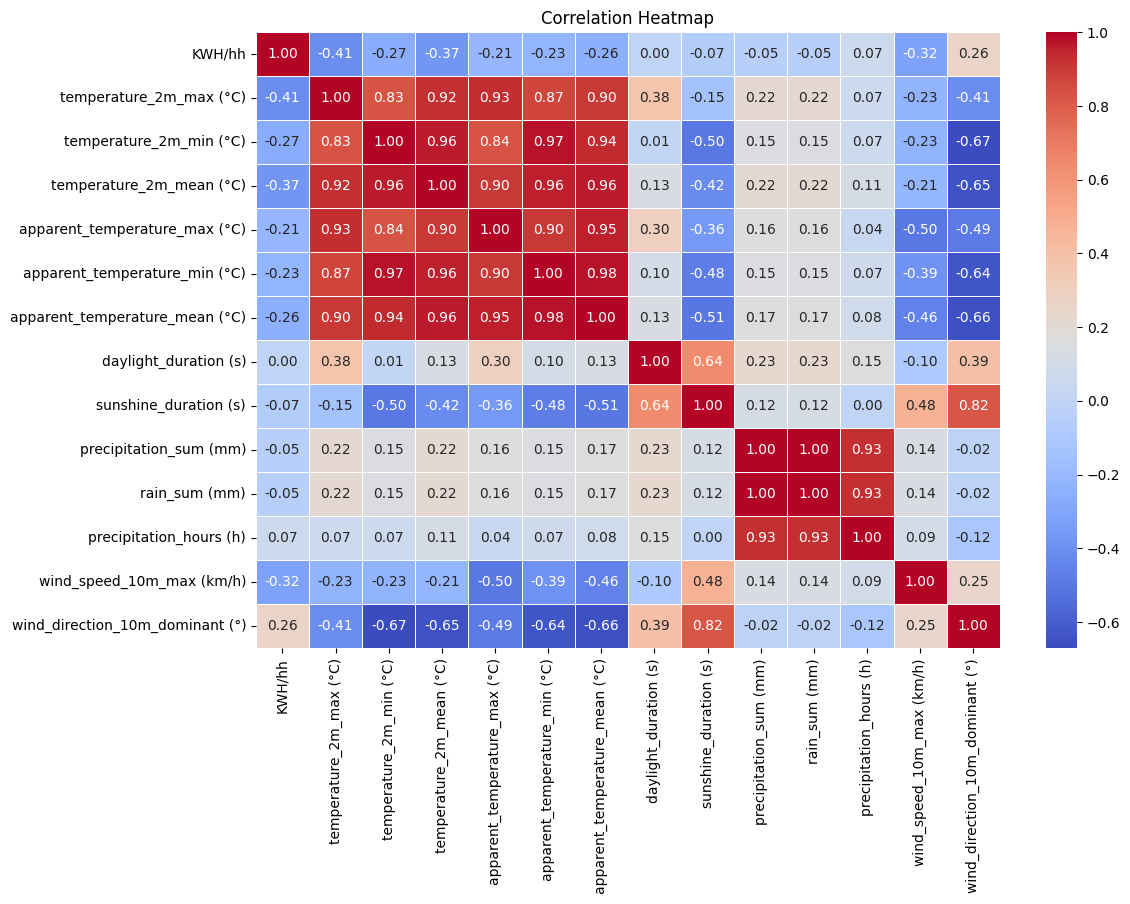

In [46]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the correlation matrix
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title and labels
plt.title('Correlation Heatmap')
plt.show()

In [43]:
cor_matrix = merged_df[['DateTime_x', 'KWH/hh', 'day', 'time', 'weather_code (wmo code)',
       'temperature_2m_max (°C)', 'temperature_2m_min (°C)',
       'temperature_2m_mean (°C)', 'apparent_temperature_max (°C)',
       'apparent_temperature_min (°C)', 'apparent_temperature_mean (°C)',
       'sunrise (iso8601)', 'sunset (iso8601)', 'daylight_duration (s)',
       'sunshine_duration (s)', 'precipitation_sum (mm)', 'rain_sum (mm)',
       'precipitation_hours (h)', 'wind_speed_10m_max (km/h)',
       'wind_direction_10m_dominant (°)', 'DateTime_y']].corr()
cor_matrix

TypeError: float() argument must be a string or a real number, not 'datetime.date'

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
# Merge datasets on 'DateTime'
merged_df = pd.merge(daily_data, weatherdf, on='day')

# Remove rows with missing values in specific columns
merge_df = merged_df.dropna(subset=['day', 'temperature_2m_max (°C)', 'temperature_2m_min (°C)', 'KWH/hh'])

# Set 'DateTime' as index
merge_df.set_index('day', inplace=True)

# Resample to daily frequency and aggregate
daily_data = merge_df.resample('D').agg({
    'KWH/hh': 'mean',
    'temperature_2m_max (°C)': 'mean',
    'temperature_2m_min (°C)': 'mean'
}).reset_index()

# Plotting
fig, ax1 = plt.subplots(figsize=(20, 5))

# Plot temperature data
ax1.plot(daily_data['day'], daily_data['temperature_2m_max (°C)'], color='tab:orange', label='TemperatureMax')
ax1.plot(daily_data['day'], daily_data['temperature_2m_min (°C)'], color='tab:pink', label='TemperatureMin')
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (°C)')
ax1.legend(loc='upper left')

# Create a second y-axis for energy consumption
ax2 = ax1.twinx()
ax2.plot(daily_data['day'], daily_data['KWH/hh'], color='tab:blue', label='avg_energy')
ax2.set_ylabel('Average Energy/Household')
ax2.legend(loc='upper right')

# Title and grid
plt.title('Energy Consumption and Temperature')
plt.grid()

plt.show()


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'